In [3]:
# importar módulo jtplot en el cuaderno
from jupyterthemes import jtplot

# elija de qué tema heredar el estilo de trazado
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='monokai')

# context = contexto (papel, cuaderno, charla, póster) (paper, notebook, talk, poster)
# fscale = tamaño de fuente de escala de ticklabels, leyenda, etc.
# spines = eliminar espinas de los ejes (x,y)
# gridlines = cuadrícula sea punteada
jtplot.style(context='notebook', fscale=1.4, spines=True, gridlines='--')

# ticks = activar las marcas de graduación de los ejes X e Y (predeterminado = Falso)
# grid = líneas de la cuadrícula del eje (predeterminado = Verdadero)
# figsize = tamaño de figura predeterminado
jtplot.style(ticks=True, grid=True, figsize=(6, 4.5))

# reset default matplotlib rcParams
#jtplot.reset()

In [4]:
#import warnings
#warnings.filterwarnings('ignore')

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#%matplotlib inline

# Objetos antecedentes/consecuentes (entradas/salidas) en una escala del 0 al 10
# contienen variables del universo y las funciones de membresía

calidad = ctrl.Antecedent(np.arange(0, 11, 1), 'calidad')
servicio = ctrl.Antecedent(np.arange(0, 11, 1), 'servicio')
propina = ctrl.Consequent(np.arange(0, 26, 1), 'propina')

In [5]:
# La población de la función de membresía automática es posible con .automf(3, 5 o 7)
calidad.automf(3)
servicio.automf(3)

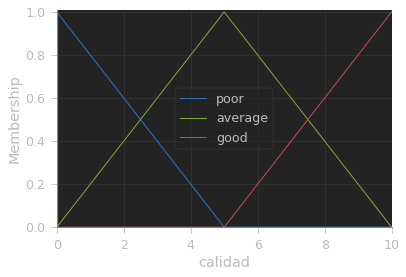

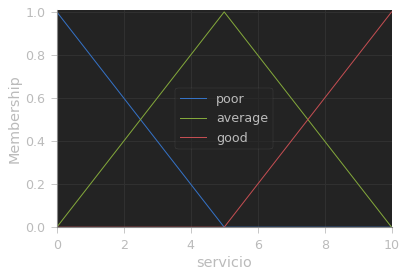

In [6]:
# Visualización con .view()
# calidad['average'].view() para resaltar el valor average
calidad.view()
servicio.view()

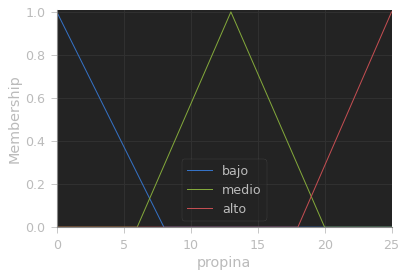

In [7]:
# Las funciones de membresía personalizadas se pueden construir interactivamente con la API Pythonic
#propina['bajo'] = fuzz.trimf(propina.universe, [0, 0, 13])
#propina['medio'] = fuzz.trimf(propina.universe, [0, 13, 25])
#propina['alto'] = fuzz.trimf(propina.universe, [13, 25, 25])

propina['bajo'] = fuzz.trimf(propina.universe, [0, 0, 8])
propina['medio'] = fuzz.trimf(propina.universe, [6, 13, 20])
propina['alto'] = fuzz.trimf(propina.universe, [18, 25, 25])

propina.view()

In [8]:
# Creación de las reglas difusas
regla1 = ctrl.Rule(calidad['poor'] | servicio['poor'], propina['bajo'])
regla2 = ctrl.Rule(servicio['average'], propina['medio'])
regla3 = ctrl.Rule(servicio['good'] | calidad['good'], propina['alto'])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

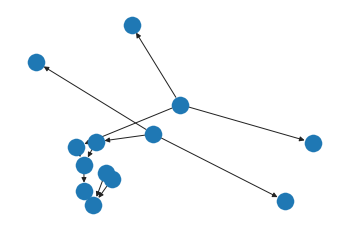

In [9]:
# Visualización de la regla 1
regla1.view()

In [10]:
# Creación y simulación de sistemas de control
## Con las reglas definidas se puede crear un sistema de control
control_propina = ctrl.ControlSystem([regla1, regla2, regla3])

# para simular este sistema de control, se crea el ControlSystemSimulation
asignacion_propina = ctrl.ControlSystemSimulation(control_propina)

In [11]:
# Pasar entradas al ControlSystem usando etiquetas 'Antecedent' con Pythonic API
# Nota: si quiere pasar muchas entradas a la vez, usar .inputs (dict_of_data)

asignacion_propina.input['calidad'] = 6.5
asignacion_propina.input['servicio'] = 9.8

# se asignan multiples entradas para una única salida, si se requiere multiples entradas y múltiples salidas,
# se debe crear una función para que calcula cada entrada y la imprima
# asignacion_propina.inputs({'calidad': 2, 'calidad': 5, 'calidad': 9, 'servicio': 3, 'servicio': 7, 'servicio': 10})

In [12]:
# Se obtiene el valor
asignacion_propina.compute()

In [13]:
# Una vez calculado, se puede visualizar

v_propina = asignacion_propina.output['propina']
print("Valor de la propina: {:.2f}".format(v_propina))

Valor de la propina: 21.38


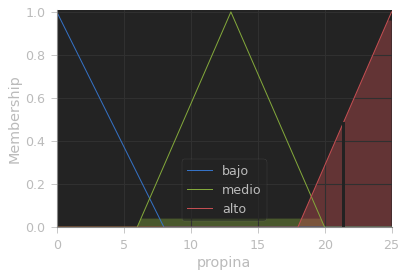

In [14]:
# Se muestra la curva de asignación de propina
propina.view(sim=asignacion_propina)